# How do blowout wins affect pythagorean win %?

This assumes you know what pythagorean win % is.

Blowout wins are defined (for my case at least) as a win with a run margin if 6 or more

I just wanted to find out how significant blowout wins were in determining a teams pythagorean win percentage. (and to mess with matplotlib and pybaseball)

In [16]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

pd.get_option("display.max_columns")
pyball.cache.enable()

In [17]:
teams = ["TBR", "TOR", "BOS", "NYY", "BAL", "CHW", "CLE", "DET", "KCR", "MIN", "HOU", "OAK", "SEA", "LAA", "TEX", "ATL", "PHI", "NYM", "MIA", "WSN", "MIL", "STL", "CIN", "CHC", "PIT", "SFG", "LAD", "SDP", "COL", "ARI"]
data = []

for i in range(len(teams)):
    #print(teams[i])
    data_temp = pyball.schedule_and_record(2021, teams[i])
    #print(i)
    data.append(data_temp)

#print(list(data[6]))

In [18]:
# assign all parts of list to an individual dataframe
team_df_dict = {}

for i in range(len(teams)):
    # dynamically create key
    key = teams[i]
    # calculate value
    value = data[i]
    team_df_dict[key] = value

CLE_data = pd.DataFrame(team_df_dict["CLE"])


0.713763658066776


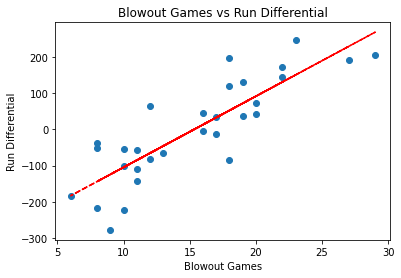

In [19]:
run_diff_teams = []
blowout_total_teams = []
runs_scored_teams = []
runs_allowed_teams = []

for i in range(len(teams)):
    team = teams[i]
    df = team_df_dict[teams[i]]

    blowout_total = 0

    for i in range(len(df['R'])):
        R = df.iloc[i]['R']
        RA = df.iloc[i]['RA']
        run_diff = R - RA
        if run_diff > 5:
            blowout_total = blowout_total + 1

    totalruns = df['R'].sum()
    totalrunsallowed = df['RA'].sum()
    run_diff_season = totalruns - totalrunsallowed

    runs_scored_teams.append(totalruns)
    runs_allowed_teams.append(totalrunsallowed)
    run_diff_teams.append(run_diff_season)
    blowout_total_teams.append(blowout_total)


plt.scatter(blowout_total_teams, run_diff_teams)

z = np.polyfit(blowout_total_teams, run_diff_teams, 1)
p = np.poly1d(z)
plt.plot(blowout_total_teams, p(blowout_total_teams),"r--")

plt.xlabel('Blowout Games')
plt.ylabel('Run Differential')
plt.title('Blowout Games vs Run Differential');

correlation_matrix = np.corrcoef(blowout_total_teams, run_diff_teams)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)


0.7117552602884364


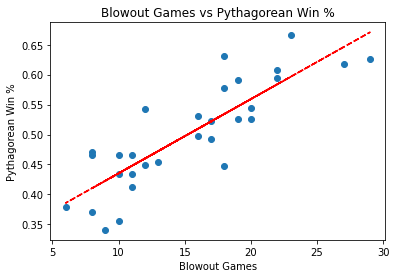

In [20]:
pythag_win_pct = []

for i in range(len(runs_scored_teams)):
    temp = 1 / (1 + (math.pow((runs_allowed_teams[i]/runs_scored_teams[i]), 1.83)))

    pythag_win_pct.append(temp)

plt.scatter(blowout_total_teams, pythag_win_pct)

x = np.polyfit(blowout_total_teams, pythag_win_pct, 1)
y = np.poly1d(x)
plt.plot(blowout_total_teams, y(blowout_total_teams),"r--")

plt.xlabel('Blowout Games')
plt.ylabel('Pythagorean Win %')
plt.title('Blowout Games vs Pythagorean Win %');
correlation_matrix = np.corrcoef(blowout_total_teams, pythag_win_pct)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)


So blowout games certainly have some correlation (r^2 value of 0.711) to a high pythagorean win %